In [5]:
R.version.string
print("email: 'Maciek Sykulski'<macieksk@gmail.com>")
length(ls())

[1] "R version 3.4.4 (2018-03-15)"

[1] "email: 'Maciek Sykulski'<macieksk@gmail.com>"


[1] 19

In [6]:
projDir<-"./"
projectPrefix<-"jupyter_EM_test_R"

#
load.sources<-function(){
    for (f in  c("utils.R" #Contains inpar, save_new_image, etc
                 #...  
                 ) 
        ){
    source(paste(projDir,"/src/",f,sep=""))
   }
}
load.sources()

In [7]:
#system.time(load(paste(projDir,"/r_saved_images/",projectPrefix,".Rdata",sep="")))
lsos()
gc()

,Type,Size,Rows,Columns
load.sources,function,24384,NA,NA
cpar,function,8904,NA,NA
multiloop,function,5376,NA,NA
postscript.call,function,4856,NA,NA
save_new_image,function,4544,NA,NA
pdf.call,function,4528,NA,NA
inpar,function,3952,NA,NA
kill.all.jobs,function,2784,NA,NA
get.global.vec,function,1840,NA,NA
lsos,function,1472,NA,NA


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,512828,27.4,940480,50.3,940480,50.3
Vcells,945284,7.3,1650153,12.6,1256260,9.6


In [4]:
gc()
#system.time(save_new_image())

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,370234,19.8,750400,40.1,506854,27.1
Vcells,567036,4.4,1308461,10.0,792761,6.1


In [20]:
library(lattice)
library(latticeExtra)
library(ggplot2)
library(gplots)
#library(png)

#library(Hmisc)
library(cluster)
library(MASS)
library(reshape)

#library(lumi)
#library(lumiHumanIDMapping)
#library(lumiHumanAll.db)
#library(limma)

#library(annotate)
#library(GOstats)

#library(multtest)
library(matrixStats)
#library(extrafont)
#library(enrichvs)
#library(statmod)
#library(flexmix)

library(scales)

load.sources()

sessionInfo()

R version 3.4.4 (2018-03-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.5 LTS

Matrix products: default
BLAS: /usr/lib/libblas/libblas.so.3.6.0
LAPACK: /usr/lib/lapack/liblapack.so.3.6.0

locale:
 [1] LC_CTYPE=en_US.UTF-8    LC_NUMERIC=C            LC_TIME=C              
 [4] LC_COLLATE=en_US.UTF-8  LC_MONETARY=C           LC_MESSAGES=en_US.UTF-8
 [7] LC_PAPER=C              LC_NAME=C               LC_ADDRESS=C           
[10] LC_TELEPHONE=C          LC_MEASUREMENT=C        LC_IDENTIFICATION=C    

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] scales_1.0.0        matrixStats_0.54.0  reshape_0.8.7      
 [4] MASS_7.3-50         cluster_2.0.7-1     gplots_3.0.1       
 [7] ggplot2_3.0.0       latticeExtra_0.6-28 RColorBrewer_1.1-2 
[10] lattice_0.20-35    

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.18         compiler_3.4.4       pillar_1.3.0        
 

<hr>

In [ ]:
##################
################## KU Science Club presentation
##################

#### Work related with 
*Finally, Bulk Typing of Bacterial Species down to Strain Level using ON-rep-seq*
Lukasz Krych, Josue Leonardo Castro Mejia, Daniel Norgaard Moesby, Morten Baastrup Mikkelsen, Morten Arendt Rasmussen, Maciej Sykulski, Dennis Sandris Nielsen
doi: https://doi.org/10.1101/402156
https://www.biorxiv.org/content/early/2018/08/28/402156

<hr>

# <font size="10px"><center> Developing pipeline for Oxford Nanopore based rep-PCR amplicon sequencing </center></font>

<h1><center>  In-silico electrophoresis - mixture decomposition </center></h1>

![EM_title_part](EM_title_part.png)

In [864]:
fnames<-sort(dir(p(projDir,"/../porechop_out.ONTsmth_GTGrem_lenstats/"),"*txt"))
substr(fnames,1,13)

[1] "repBC01.fastq" "repBC02.fastq" "repBC03.fastq" "repBC04.fastq"
 [5] "repBC05.fastq" "repBC06.fastq" "repBC07.fastq" "repBC08.fastq"
 [9] "repBC09.fastq" "repBC10.fastq" "repBC11.fastq" "repBC12.fastq"
[13] "repBC13.fastq" "repBC14.fastq" "repBC15.fastq" "repBC17.fastq"
[17] "repBC18.fastq" "repBC19.fastq" "repBC20.fastq" "repBC21.fastq"
[21] "repBC22.fastq" "repBC23.fastq" "repBC24.fastq" "repBC25.fastq"
[25] "repBC27.fastq" "repBC28.fastq" "repBC29.fastq" "repBC30.fastq"
[29] "repBC31.fastq" "repBC32.fastq" "repBC33.fastq" "repBC34.fastq"
[33] "repBC35.fastq" "repBC37.fastq" "repBC38.fastq" "repBC39.fastq"
[37] "repBC40.fastq" "repBC41.fastq" "repBC42.fastq" "repBC43.fastq"
[41] "repBC44.fastq" "repBC45.fastq" "repBC46.fastq" "repBC47.fastq"
[45] "repBC48.fastq" "repBC49.fastq" "repBC50.fastq" "repBC51.fastq"
[49] "repBC52.fastq" "repBC53.fastq" "repBC54.fastq" "repBC55.fastq"
[53] "repBC56.fastq" "repBC58.fastq" "repBC59.fastq" "repBC60.fastq"
[57] "repBC62.fastq" "repBC63.fastq" "repBC64.fastq" "repBC65.fastq"
[61] "repBC66.fastq" "repBC68.fastq" "repBC69.fastq" "repBC70.fastq"

![EM_peaks_all](EM_peaks_all.png)

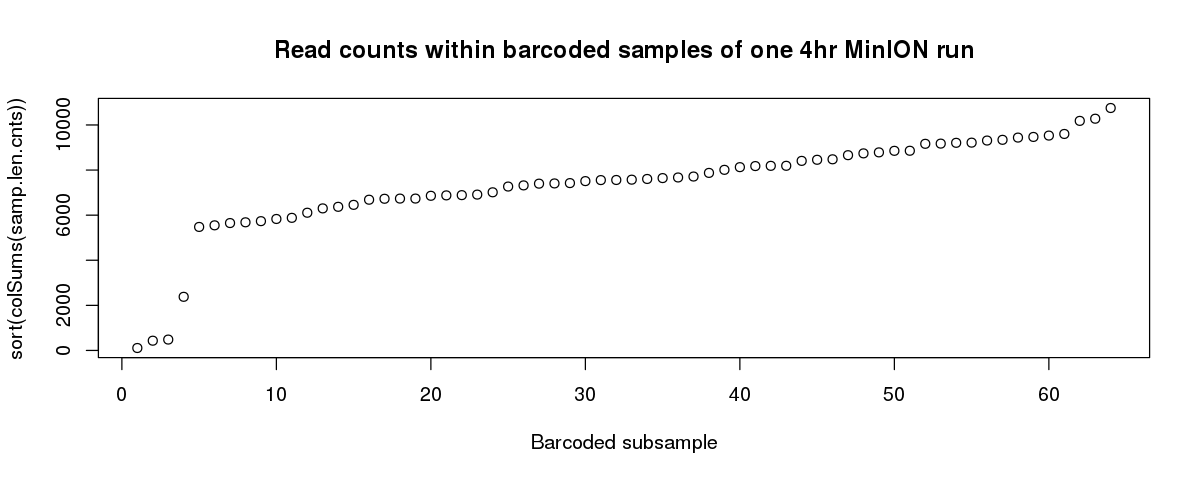

In [871]:
#samp.len.cnts<-data.frame()
samp.len.cnts<-matrix(0,8000,length(fnames))
#dim(samp.len.cnts)
for (i in seq_along(fnames)){
    f<-fnames[i]
    cnts<-read.table(p(projDir,"/../porechop_out.ONTsmth_GTGrem_lenstats/",f),header=FALSE)
    cnts[,1]<-as.integer(cnts[,1])
    cnts[,2]<-as.integer(cnts[,2])
    #print(class(cnts[,1]))
    samp.len.cnts[cnts[,2],i]<-cnts[,1]            
}
colnames(samp.len.cnts)<-substr(fnames,1,7)
options(repr.plot.width=10, repr.plot.height=4,res=120)
plot(sort(colSums(samp.len.cnts)),main="Read counts within barcoded samples of one 4hr MinION run",
     xlab="Barcoded subsample")

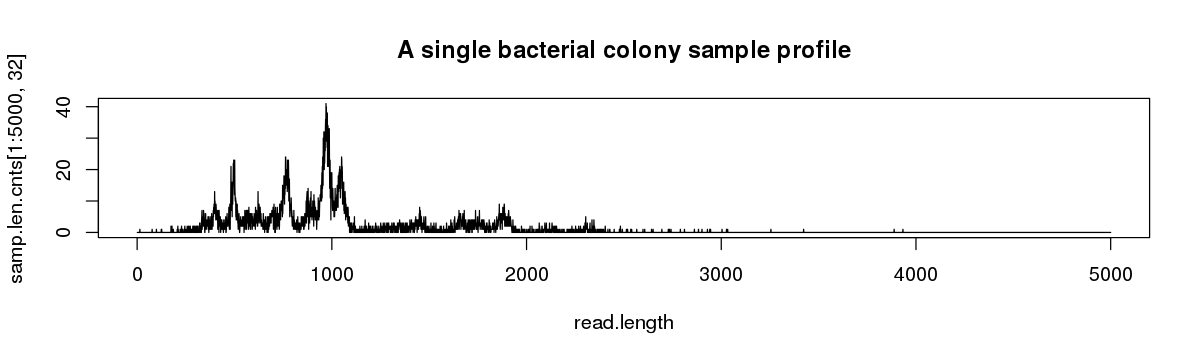

In [872]:
options(repr.plot.width=10, repr.plot.height=3,res=120)
plot(samp.len.cnts[1:5000,32],type="l",pch=".",xlab="read.length",main="A single bacterial colony sample profile")

s,5,3,8,10,6,3,7,9,2,6
,NA,NA,6,6,6,7,5,5,NA,NA


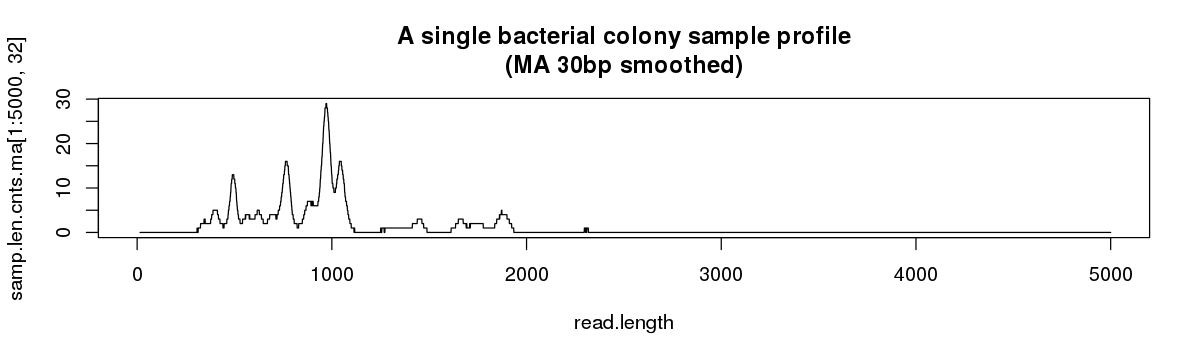

In [886]:
ma <- function(x,n=5){filter(x,rep(1/n,n), sides=2)}
s<-sample(10,10,replace=TRUE)
rbind(s,
as.integer(ma(s)))
samp.len.cnts.ma<-apply(samp.len.cnts,2,function(r)as.integer(ma(r,30)))
options(repr.plot.width=10, repr.plot.height=3,res=120)    
plot(samp.len.cnts.ma[1:5000,32],type="l",pch=".",xlab="read.length",main="A single bacterial colony sample profile\n(MA 30bp smoothed)")    

In [881]:
#install.packages("forecast")

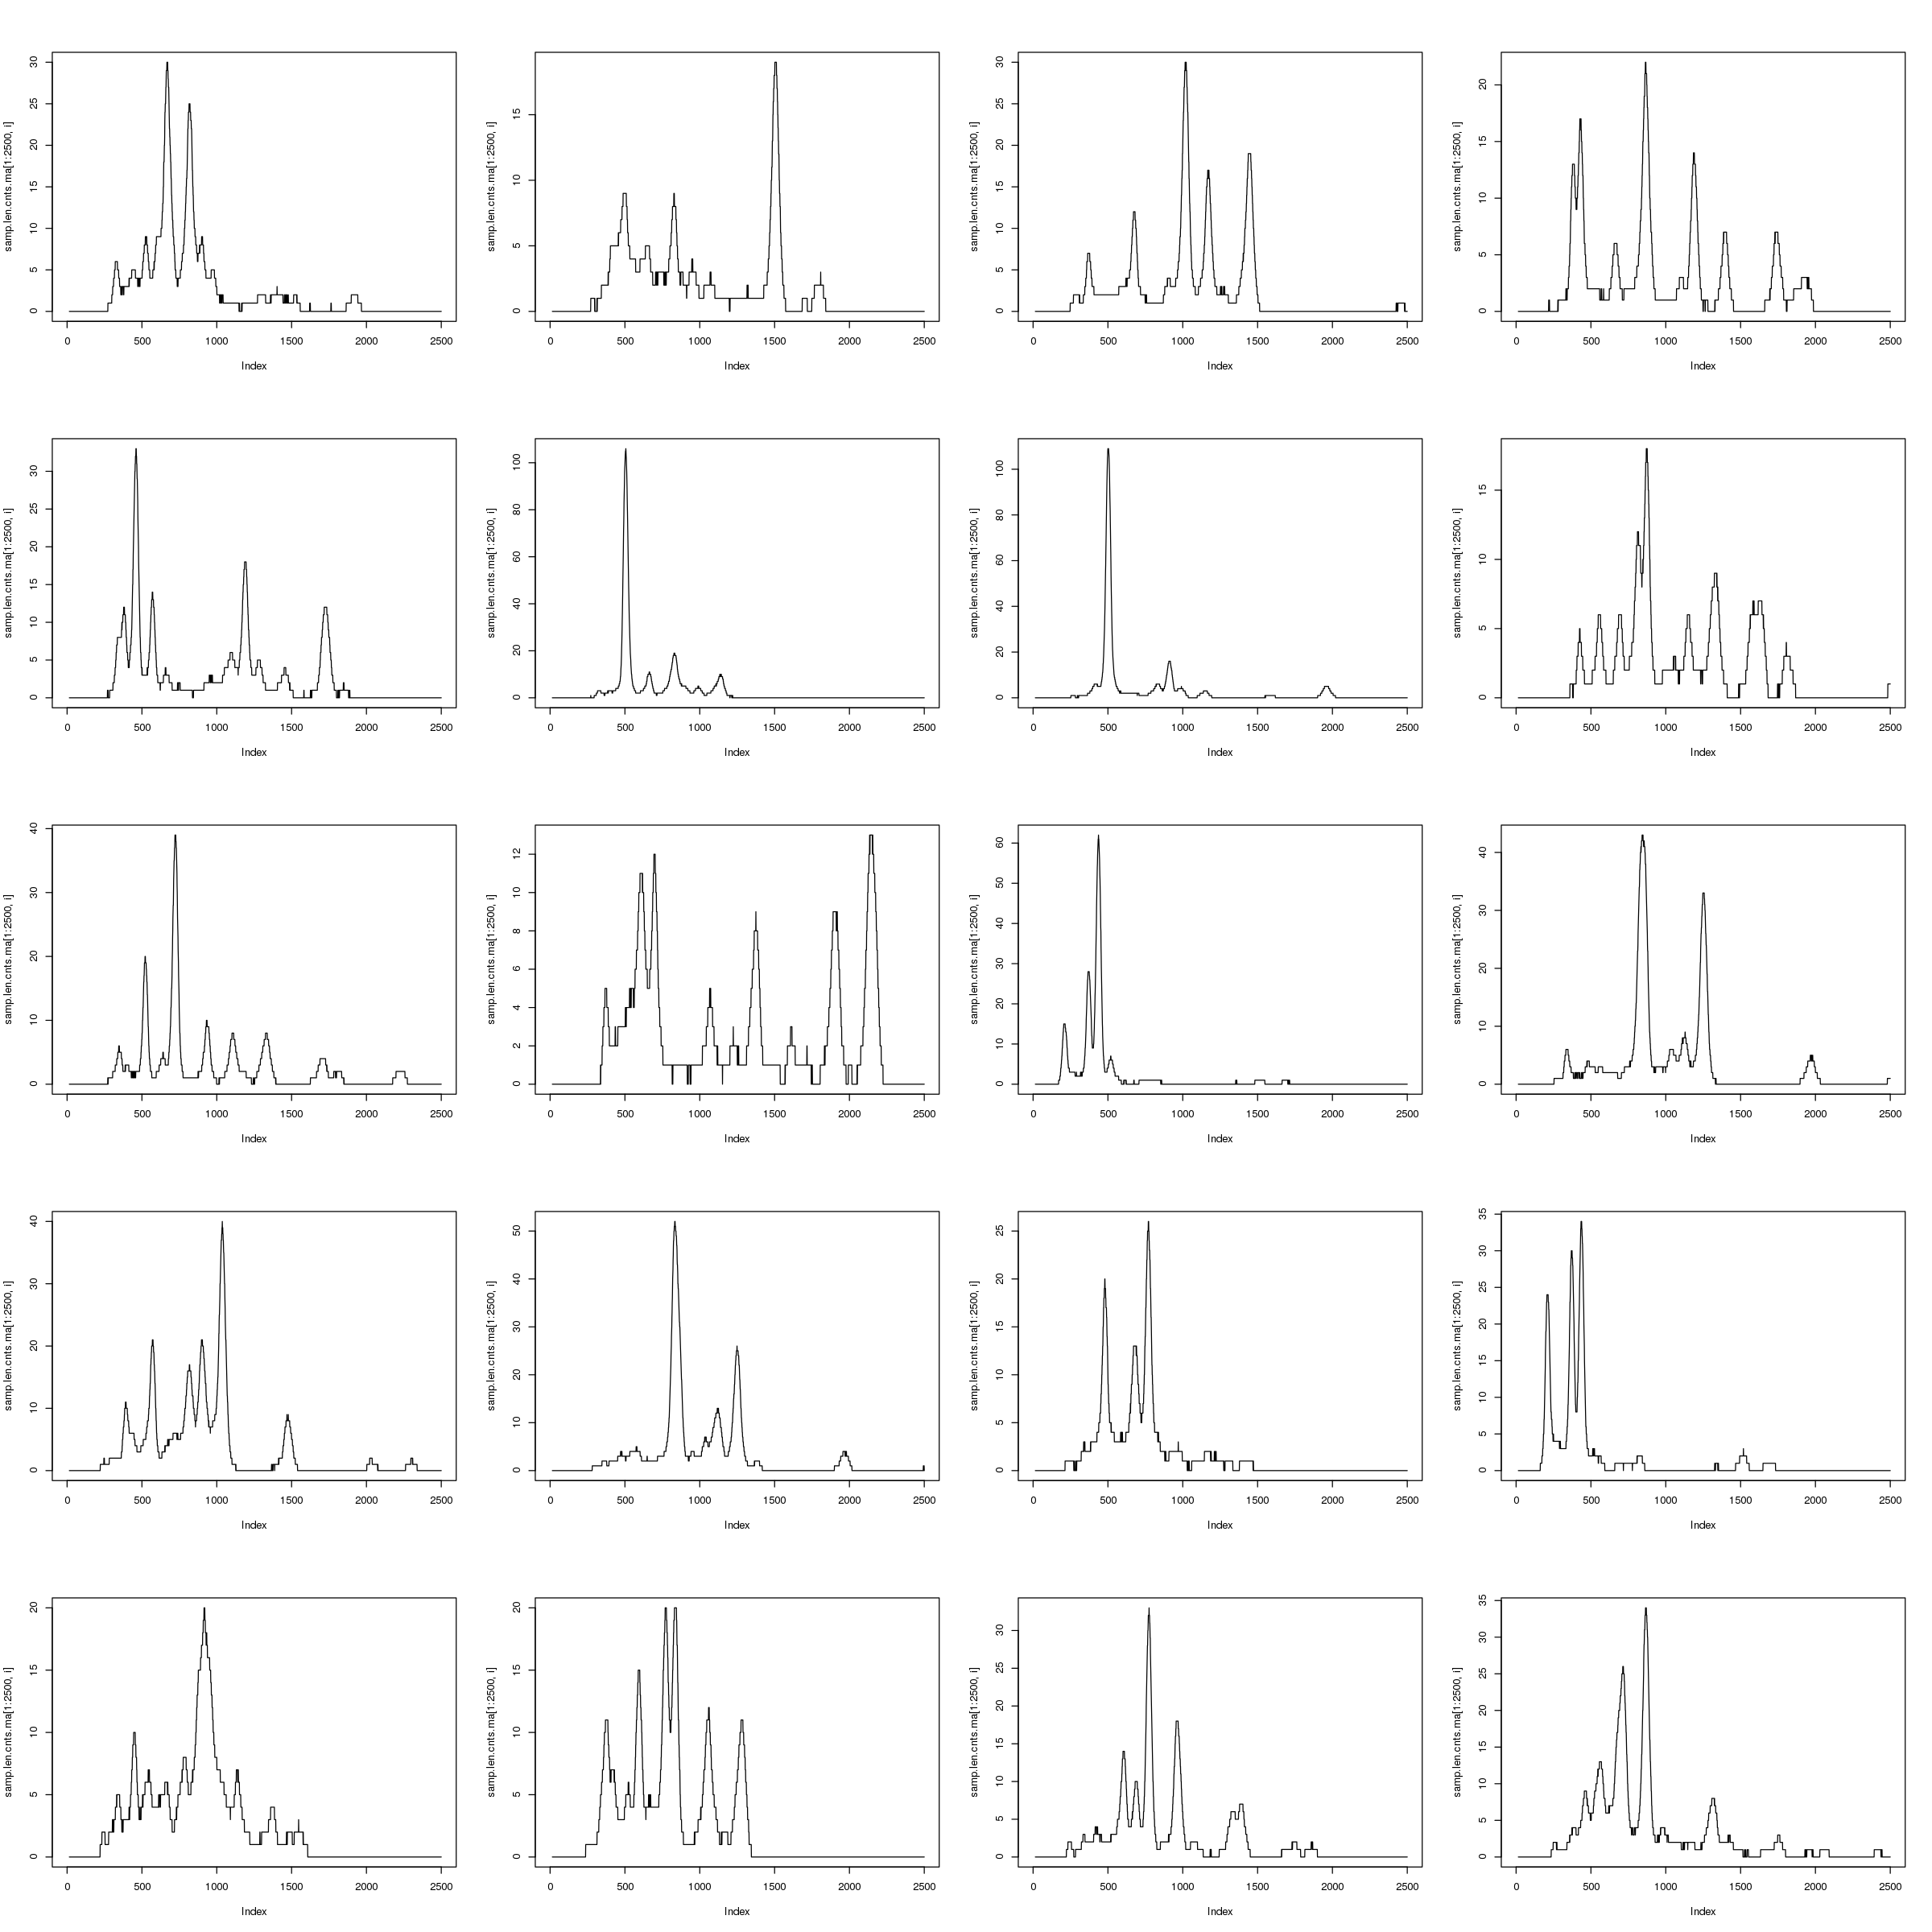

In [551]:
options(repr.plot.width=20, repr.plot.height=20,res=120)
par(mfrow=c(5,4))
for (i in 1:20){
plot(samp.len.cnts.ma[1:2500,i],type="l",pch=".")
}    

In [ ]:
## Sample reads (lengths) from mixture of species

<br>
<br>
<br>

# <center> Consider: sequenced reads from a mixed bacterial sample </center>
<br>
<br>
<br>

In [884]:
##
## Normalize database of known profiles
##
samp.len.cnts.ma.norm<-apply(samp.len.cnts.ma,2,function(v)as.numeric(v)/sum(v,na.rm=TRUE))
samp.len.cnts.ma.norm[is.na(samp.len.cnts.ma.norm)]<-0

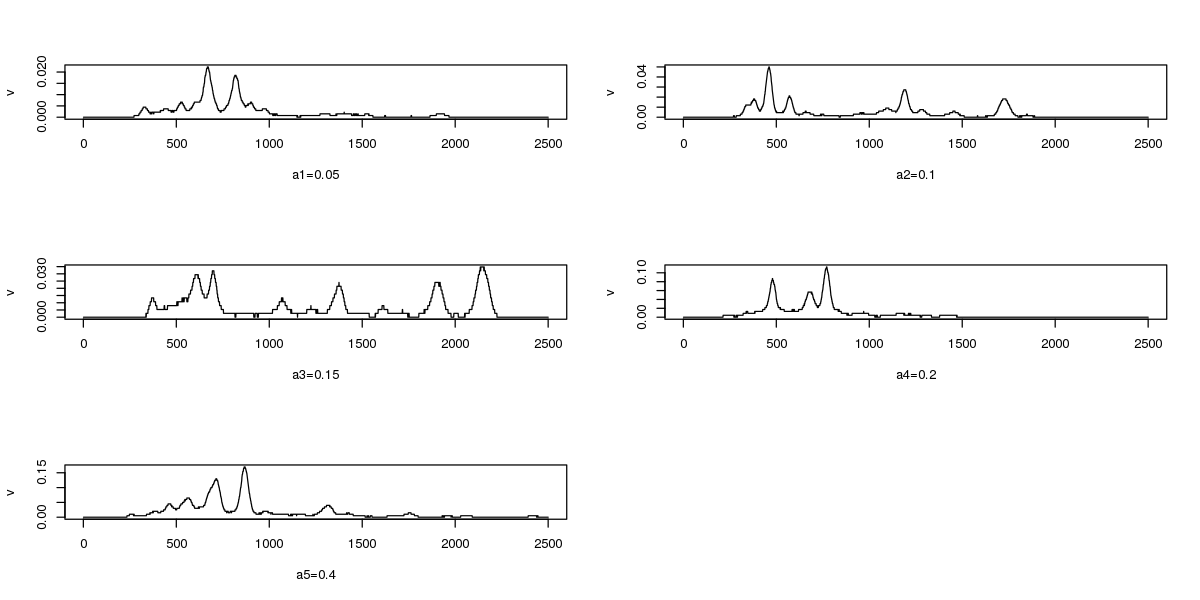

In [882]:
options(repr.plot.width=10, repr.plot.height=5)

sel.species<-c(1,5,10,15,20)
alpha<-c(0.05,0.1,0.15,0.2,0.4)

par(mfrow=c(3,2))
sel.vecs<-mapply(function(i,j,a,n){
    v<-samp.len.cnts.ma.norm[1:2500,i]*a*100    
    plot(v,type="l",pch=".",xlab=p("a",j,"=",alpha[j]))
    v
},sel.species,seq_along(sel.species),alpha,round(alpha*50))

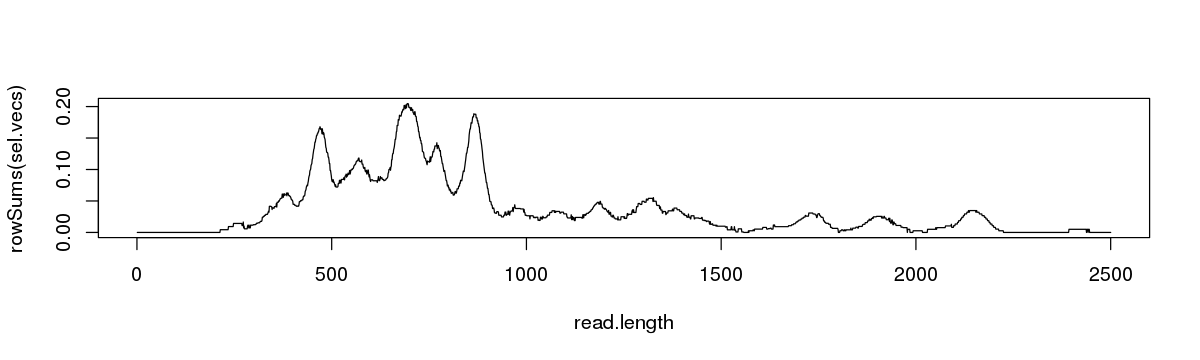

In [831]:
options(repr.plot.width=10, repr.plot.height=3)
plot(rowSums(sel.vecs),type="l",pch=".",xlab="read.length")

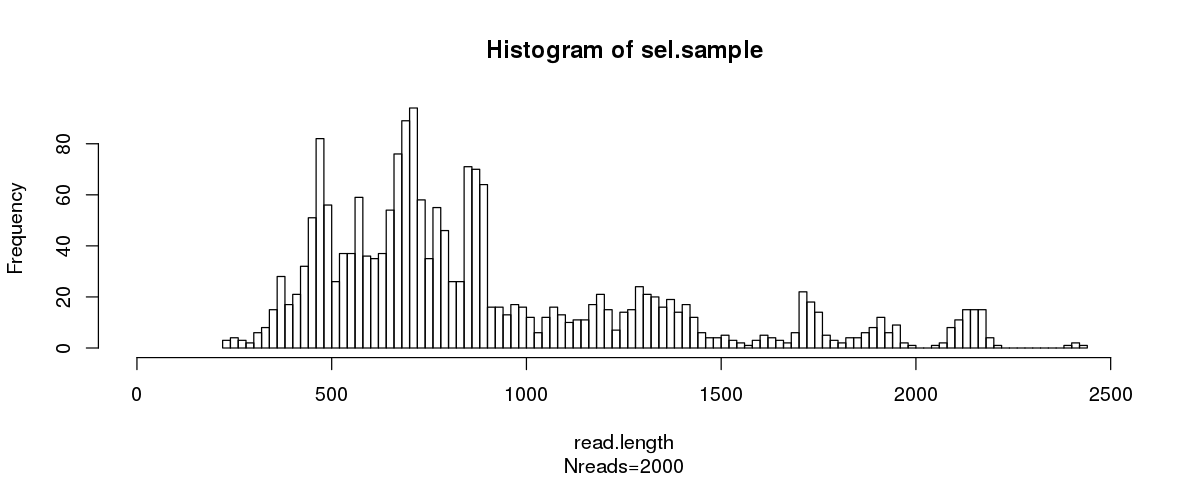

In [847]:
prob<-rowSums(sel.vecs)
prob[is.na(prob)]<-0
Nreads<-2000
sel.sample <- sample(seq_len(NROW(sel.vecs)),Nreads,prob=prob,replace = TRUE)
sel.samp.hist<-hist(sel.sample,xlim=c(1,2500),breaks=100,xlab="read.length",sub=p("Nreads=",Nreads))

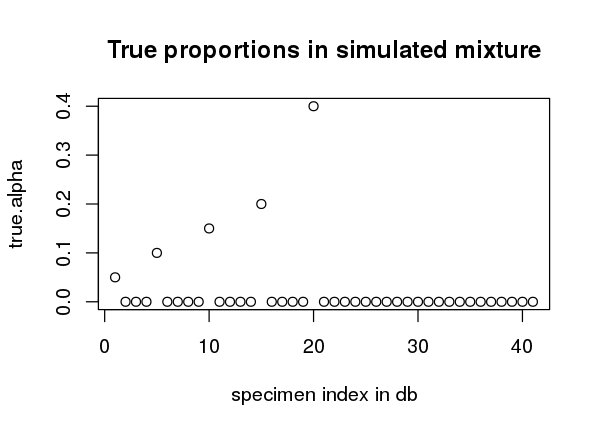

In [829]:
sel.sample<-sort(sel.sample)

db.cols<-c(1:20,30:50)#1:NCOL(samp.len.cnts.ma.norm)

options(repr.plot.width=5, repr.plot.height=3.6)
true.alpha<-numeric(NROW(db.cols))
true.alpha[sel.species]<-alpha
plot(true.alpha, xlab="specimen index in db", main="True proportions in simulated mixture")

<hr>
<br>
<br>

# <center> Can we recover proportions of bacteria (species, strains) <br>in the mixture given, say, 2000 reads? <center>
<br>
<br>
<hr>

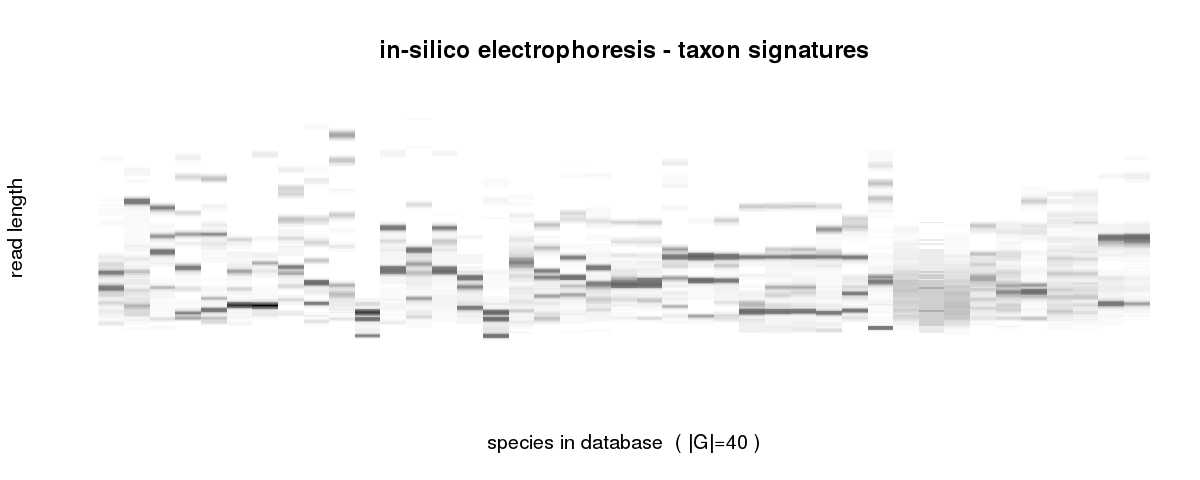

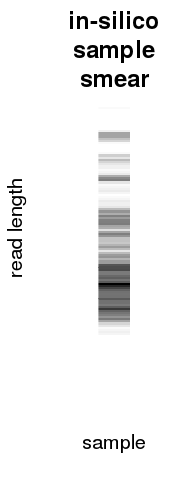

In [867]:
options(repr.plot.width=10, repr.plot.height=4)

plot.matrix<-function(z,low=0,high=1,axes=FALSE,...){    
    image(1:ncol(z), 1:nrow(z), round(t((z-low)/(high-low))*100), 
          #col = grey_pal(1,0)(100),
          col = c(grey_pal(1,0.5)(20),grey_pal(0.5,0)(80)), 
          axes = axes,...)
}

slcmn<-samp.len.cnts.ma.norm[1:2500,db.cols]
plot.matrix(samp.len.cnts.ma.norm[1:2500,db.cols],
            low=min(slcmn,na.rm=TRUE),high=max(slcmn,na.rm=TRUE),
            xlab="species in database  ( |G|=40 )",ylab="read length",
            main="in-silico electrophoresis - taxon signatures")
#samp.len.cnts.ma.norm[1:2500,db.cols]
sel.samp.smear<-matrix(0,2500,1)
for (b in 1:(NROW(sel.samp.hist$breaks)-1)){
  sel.samp.smear[sel.samp.hist$breaks[b]:(sel.samp.hist$breaks[b+1]-1),1]<-sel.samp.hist$density[b]
}    
options(repr.plot.width=1.5, repr.plot.height=4)
plot.matrix(sel.samp.smear,
            low=min(sel.samp.smear,na.rm=TRUE),high=max(sel.samp.smear,na.rm=TRUE),
            xlab="sample",ylab="read length",
            main="in-silico\nsample\nsmear")

In [ ]:
#TODO 2000 reads to Likelihood, EM explanation


# Likelihood of obtaining a given sample  
<br>
<font size="4px"> Unknowns: </font>  

### 1. abundances  $$\alpha_g = \left(\alpha_1,\alpha_2,\ldots,\alpha_{|G|}\right)$$ <br> such that  $$\sum_{g\in G} \alpha_g = 1$$ <br> each corresponds to proportion of reads from the whole sample which belong to genome g.<br> <font size="2px"> (Here G is the set of all genomes plus U - categories of unknown/unclassified reads.) </font>

<br>
<br>

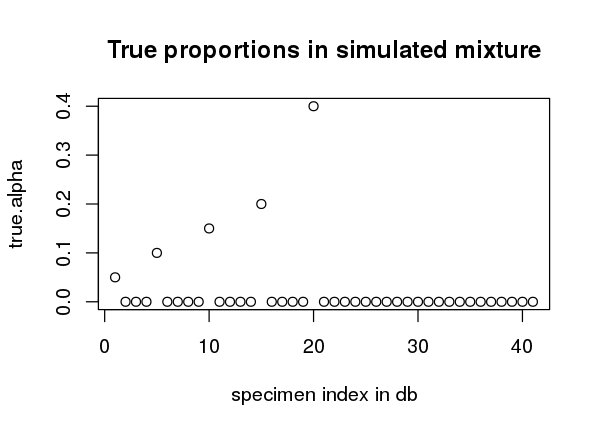

In [893]:
options(repr.plot.width=5, repr.plot.height=3.6)
plot(true.alpha, xlab="specimen index in db", main="True proportions in simulated mixture")

### 2. assignment indicator 0-1 variables $$y_{f,g}$$ which if equal to 1 mean that fragment (read) f comes from genome(species/strain - category) $g$.  $$\sum_{g\in G} y_{f,g} = 1$$

<br>

![EM_yfg](EM_yfg.png)
<br>


<hr>

# Likelihood of single read 
## given data and abundances

### If we know which genome from database a read $f$ comes from, then probability of obtaining such read is:
#### 1. Probability of sampling from mixture <font size="4px"> $\alpha$ </font>, which simply is: <font size="4px"> $$\alpha_g$$ </font>
#### 2. Probability of obtaining a read of a given length (in 1st approximation):  <font size="4px"> $$P(f|g)$$</font>

# $$  P(f|g) \cdot \alpha_{g} $$

<br>

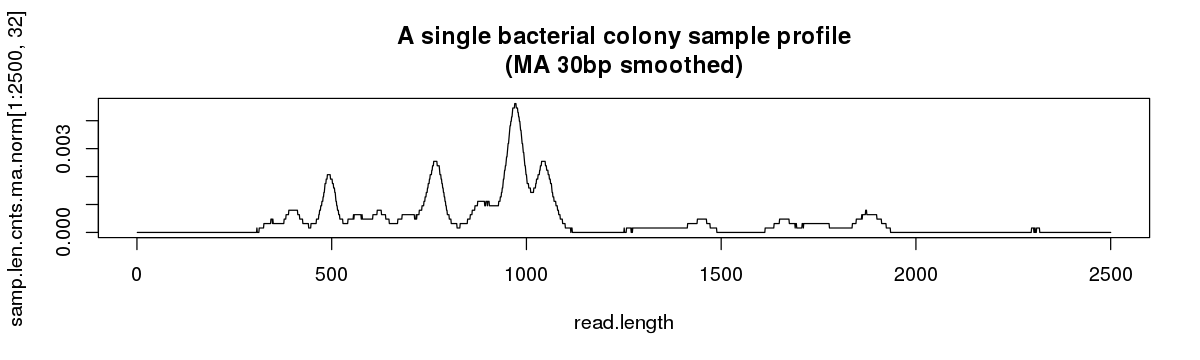

In [895]:
options(repr.plot.width=10, repr.plot.height=3,res=120)    
plot(samp.len.cnts.ma.norm[1:2500,32],type="l",pch=".",xlab="read.length",main="A single bacterial colony sample profile\n(MA 30bp smoothed)")    

<br>
<hr>
<br>

### A priori we don't know which genome the read comes from, thus we write the following expression for likelihood:

# $$\textrm{Likelihood single read }\, f = $$ <br> $$\frac{ \prod_{g \in G} P(f|g)^{y_{f,g}} \alpha_{g}^{y_{f,g}} }{\textrm{const}}$$



# $$\textrm{Total Likelihood} = $$ <br> $$\frac{\left(\prod_{f \in F} \prod_{g \in G} P(f|g)^{y_{f,g}} \alpha_{g}^{y_{f,g}} \right) \cdot P_{prior}(\alpha)}{\textrm{const}}$$

### How do we maximize it?
<br>
<br>


<hr>

# <center> Expectation Maximization algorithm (EM) <br> for mixture decomposition </center> 
![EM animation](EM_cool-soft.gif)
https://twitwi.github.io/Presentation-2015-dirichlet-processes/gmm2d/cool-soft.gif
<hr>

![EM](EM_EMslide1.png)

In [906]:
l<-t(sapply(sel.sample,function(read.length){
        samp.len.cnts.ma.norm[read.length,db.cols]
}))
print("Matrix l = P(f|g)")
l[1000:1010,]

[1] "Matrix l = P(f|g)"


repBC01,repBC02,repBC03,repBC04,repBC05,repBC06,repBC07,repBC08,repBC09,repBC10,⋯,repBC44,repBC45,repBC46,repBC47,repBC48,repBC49,repBC50,repBC51,repBC52,repBC53
0.0007419498,0.0004408199,0.0001560793,0.0003472825,0.0001514463,0.0003787401,0.0001343003,0.0005773672,0.0006925208,0.0001782849,⋯,0.001363430,0.00141844,0.001082642,0.002340234,0.0008435259,0.0002332906,0.0007074637,0.0006370441,0.0008649272,0.000524659
0.0007419498,0.0004408199,0.0001560793,0.0003472825,0.0001514463,0.0003787401,0.0001343003,0.0005773672,0.0006925208,0.0001782849,⋯,0.001363430,0.00141844,0.001082642,0.002340234,0.0008435259,0.0002332906,0.0007074637,0.0006370441,0.0008649272,0.000524659
0.0007419498,0.0006612299,0.0001560793,0.0003472825,0.0001514463,0.0003787401,0.0001343003,0.0005773672,0.0006925208,0.0001782849,⋯,0.001211938,0.00141844,0.001082642,0.002340234,0.0009841136,0.0002332906,0.0007074637,0.0007963051,0.0008649272,0.000524659
0.0007419498,0.0006612299,0.0001560793,0.0003472825,0.0001514463,0.0003787401,0.0001343003,0.0005773672,0.0006925208,0.0001782849,⋯,0.001211938,0.00141844,0.001082642,0.002340234,0.0009841136,0.0002332906,0.0007074637,0.0007963051,0.0008649272,0.000524659
0.0007419498,0.0004408199,0.0001560793,0.0003472825,0.0001514463,0.0003787401,0.0001343003,0.0005773672,0.0005193906,0.0001782849,⋯,0.001211938,0.00141844,0.001082642,0.002340234,0.0008435259,0.0002332906,0.0007074637,0.0007963051,0.0008649272,0.000524659
0.0007419498,0.0004408199,0.0001560793,0.0003472825,0.0001514463,0.0003787401,0.0001343003,0.0005773672,0.0005193906,0.0001782849,⋯,0.001211938,0.00141844,0.001082642,0.002340234,0.0008435259,0.0002332906,0.0007074637,0.0007963051,0.0008649272,0.000524659
0.0007419498,0.0004408199,0.0001560793,0.0003472825,0.0001514463,0.0003787401,0.0001343003,0.0005773672,0.0005193906,0.0001782849,⋯,0.001211938,0.00141844,0.001082642,0.002340234,0.0008435259,0.0002332906,0.0007074637,0.0007963051,0.0008649272,0.000524659
0.0007419498,0.0004408199,0.0001560793,0.0003472825,0.0001514463,0.0003787401,0.0001343003,0.0005773672,0.0005193906,0.0001782849,⋯,0.001211938,0.00141844,0.001082642,0.002340234,0.0008435259,0.0002332906,0.0007074637,0.0007963051,0.0008649272,0.000524659
0.0007419498,0.0004408199,0.0001560793,0.0003472825,0.0001514463,0.0003787401,0.0001343003,0.0005773672,0.0005193906,0.0001782849,⋯,0.001211938,0.00141844,0.001082642,0.002340234,0.0008435259,0.0002332906,0.0007074637,0.0007963051,0.0008649272,0.000524659
0.0008903398,0.0004408199,0.0001560793,0.0003472825,0.0001514463,0.0005049867,0.0001343003,0.0005773672,0.0005193906,0.0001782849,⋯,0.001211938,0.00141844,0.001082642,0.002340234,0.0008435259,0.0002332906,0.0007074637,0.0007963051,0.0008649272,0.000524659


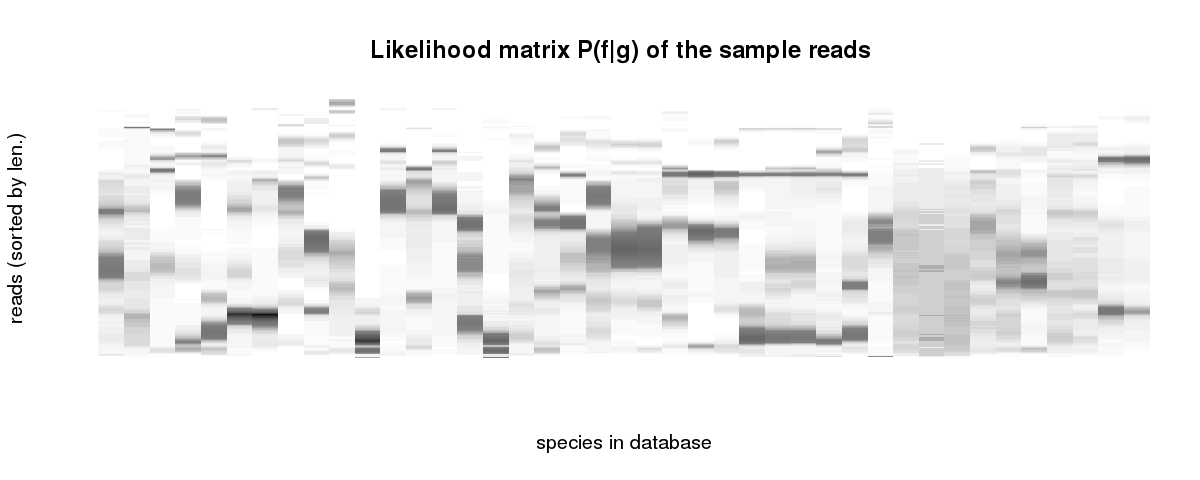

In [904]:
options(repr.plot.width=10, repr.plot.height=4)
plot.matrix(l,low=min(l,na.rm=TRUE),high=max(l,na.rm=TRUE),
            xlab="species in database",ylab="reads (sorted by len.)",
            main="Likelihood matrix P(f|g) of the sample reads ")

In [836]:
#TODO Conjugate Priors
#Dirichlet distribution

https://en.wikipedia.org/wiki/Dirichlet_distribution

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1

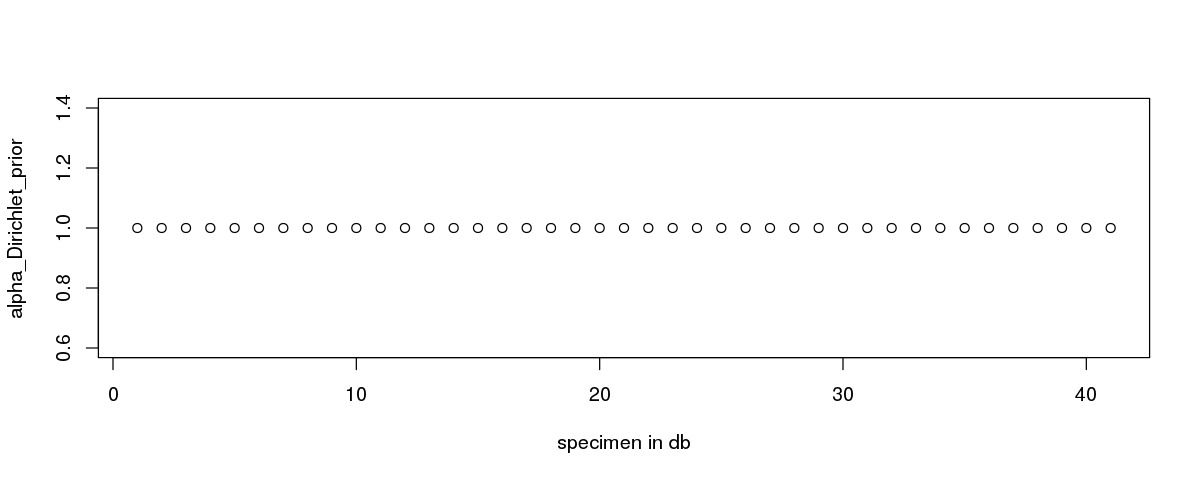

In [840]:
a_prior<-rep(1,NCOL(l))
a_prior
options(repr.plot.width=10, repr.plot.height=4)
plot(a_prior,xlab="specimen in db",ylab="alpha_Dirichlet_prior")

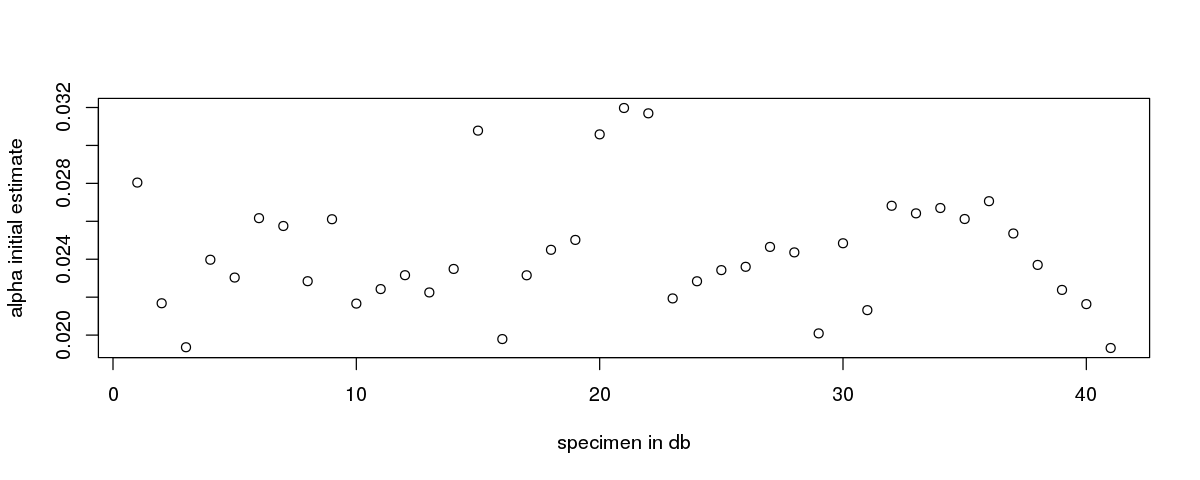

In [898]:
new_z_Estep<-function(a,l,hard=FALSE){
    
    la<-t(t(l)*a)
    z<-la/rowSums(la)
    
    if (hard) {
        z<-(z==rowMaxs(z))
        z[z]<-1.0
    }    
    z
}

new_a_Mstep<-function(z,a_prior){
    effective_exponents <- colSums(z) + a_prior
    effective_exponents/sum(effective_exponents)    
}

aorig<-new_a_Mstep(l,a_prior)
a<-aorig
zorig<-new_z_Estep(a,l)
z<-zorig

options(repr.plot.width=10, repr.plot.height=4)
plot(a,xlab="specimen in db",ylab="alpha initial estimate")

In [798]:
options(repr.plot.width=10, repr.plot.height=18)
#par(mfrow=c(5,2))
do.plot.matrix<-TRUE
saveGIF({
v<-c(1,1,2,5,5,5,19,25,1000)
step<-0
if (do.plot.matrix) plot.matrix(z,xlab=p("species, EMstep=",step),ylab="reads")
else                plot(a,xlab=p("alpha, EMstep=",step))
for (j in seq_along(v)){
for (i in 1:v[j]){
 
 zn<-new_z_Estep(a,l)#,hard=i==50)
 
 stopifnot(all(abs(rowSums(zn)-1)<0.00001))
 print(sqrt(sum(abs((zn-z)^2))))
 z<-zn

 an<-new_a_Mstep(z,a_prior)
 print(sqrt(sum(abs((an-a)^2))))
 a<-an

 #a
 #z
 step<-step+1    
}
if (do.plot.matrix) plot.matrix(z,xlab=p("species, EMstep=",step),ylab="reads")
else                plot(a,xlab=p("alpha, EMstep=",step))
}

},movie.name = p("EMfp_",c("alpha","matrix")[do.plot.matrix+1],"_animation.gif"), 
    img.name = "EMfpRplot", convert = "convert",   
#},video.name = "animation.mp4", img.name = "zRplot",
interval=1,loop=TRUE) 
#dev.off()

[1] 0
[1] 0.03810498
[1] 2.572637
[1] 0.03301296
[1] 1.794381
[1] 0.02683712
[1] 1.40934
[1] 0.02224586
[1] 1.200387
[1] 0.01951912
[1] 1.082592
[1] 0.0180313
[1] 1.00709
[1] 0.01712159
[1] 0.9482253
[1] 0.01638938
[1] 0.8946656
[1] 0.01565953
[1] 0.8423744
[1] 0.01488081
[1] 0.7905019
[1] 0.01405569
[1] 0.7393701
[1] 0.01320446
[1] 0.6895927
[1] 0.0123497
[1] 0.6417336
[1] 0.01151038
[1] 0.5962029
[1] 0.01070045
[1] 0.5532498
[1] 0.009929147
[1] 0.5129899
[1] 0.009201818
[1] 0.4754382
[1] 0.008520938
[1] 0.44054
[1] 0.007886933
[1] 0.4081952
[1] 0.007298858
[1] 0.3782764
[1] 0.006754898
[1] 0.3506414
[1] 0.006252729
[1] 0.325142
[1] 0.005789768
[1] 0.3016299
[1] 0.005363341
[1] 0.2799602
[1] 0.004970787
[1] 0.259994
[1] 0.004609528
[1] 0.2415991
[1] 0.004277106
[1] 0.2246514
[1] 0.003971207
[1] 0.2090347
[1] 0.003689665
[1] 0.1946408
[1] 0.00343047
[1] 0.1813695
[1] 0.003191762
[1] 0.169128
[1] 0.002971826
[1] 0.157831
[1] 0.002769083
[1] 0.1473998
[1] 0.002582084
[1] 0.1377623
[1] 0.

Executing: 
convert -loop 0 -delay 100 EMfpRplot1.png EMfpRplot2.png
    EMfpRplot3.png EMfpRplot4.png EMfpRplot5.png EMfpRplot6.png
    EMfpRplot7.png EMfpRplot8.png EMfpRplot9.png EMfpRplot10.png
    'EMfp_matrix_animation.gif'
Output at: EMfp_matrix_animation.gif


[1] TRUE

Alpha (current proportions)  | Z-matrix (current assignments expectations)
- | -
![animation](EMfp_alpha_animation.gif "EMfp_alpha_animation") | ![animation](EMfp_matrix_animation.gif "EMfp_matrix_animation")

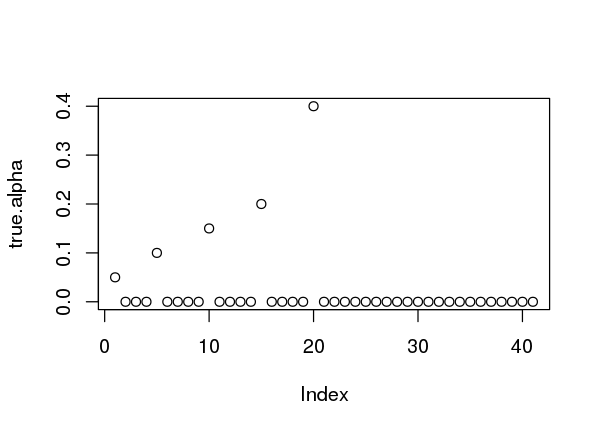

In [773]:
options(repr.plot.width=5, repr.plot.height=3.6)
plot(true.alpha)

<hr>
<br>
<br>
<br>

- ## Consider read sequences (not only read lengths):
### ---> P(f|g) ~ alignment likelihood to a peak consensus sequences from the database  </center>

<br>
<br>
<br>
<hr>


<hr>
<br>
<br>
<br>

## <center> Big Data? --> sparse matrices </center>

<br>
<br>
<br>
<hr>


<hr>
<br>
<br>

# <center> Thank You <center>
<br>
<br>
<hr>

<hr>
<br>
<br>

# <center> QA <center>
<br>
<br>
<hr>

In [43]:
#z<-matrix(runif(100),20,4)
#z<-z/rowSums(z)
#m<-t(t(m)/colSums(m))
#colSums(m)

n<-20
k<-4

l<-matrix(exp(sapply(1:k,function(i)rnorm(n,i/3))),n,k)

#for (i in 1:(NROW(l)-1)){
#    j<-which.max(sapply(1:NROW(l),function(j)cor(l[j,],l[i,])))
#}

a<-runif(k)
a<-a/sum(a)
a_prior<-rep(1,k)
a_prior[1]<-10

In [42]:
new_z_Estep<-function(a,l,hard=FALSE){
    la<-t(t(l)*a)
    z<-la/rowSums(la)
    
    if (hard) {
        z<-(z==rowMaxs(z))
        z[z]<-1.0
    }    
    z
}

new_a_Mstep<-function(z,a_prior){
    effective_exponents <- colSums(z) + a_prior
    effective_exponents/sum(effective_exponents)    
}

#aorig<-new_a_Mstep(l,a_prior)
#a<-aorig
zorig<-new_z_Estep(a,l)
z<-zorig

In [39]:
for (i in 1:1000){dev.off()}
#grey_pal(1,0)(10)

ERROR: Error in dev.off(): cannot shut down device 1 (the null device)


[1] 1.894232
[1] 0.06333545
[1] 0.2098169
[1] 0.02569713
[1] 0.1018381
[1] 0.01227275
[1] 0.05634363
[1] 0.006690174
[1] 0.03383009
[1] 0.003974278
[1] 0.02117287
[1] 0.002470453
[1] 0.01350234
[1] 0.001568893
[1] 0.008681511
[1] 0.001006173
[1] 0.005602043
[1] 0.0006482505
[1] 0.003620833
[1] 0.0004185839
[1] 0.002342118
[1] 0.0002705944
[1] 0.001515578
[1] 0.0001750342
[1] 0.0009809284
[1] 0.0001132603
[1] 0.0006349595
[1] 7.330276e-05
[1] 0.0004110393
[1] 4.744778e-05
[1] 0.0002660956
[1] 3.071453e-05
[1] 0.0001722672
[1] 1.988345e-05
[1] 0.0001115254
[1] 1.287219e-05
[1] 7.220195e-05
[1] 8.333372e-06
[1] 4.674409e-05
[1] 5.395034e-06
[1] 3.02626e-05
[1] 3.492777e-06
[1] 1.959235e-05
[1] 2.261255e-06
[1] 1.268434e-05
[1] 1.463961e-06
[1] 8.212006e-06
[1] 9.47786e-07
[1] 5.316564e-06
[1] 6.136089e-07
[1] 3.442017e-06
[1] 3.972586e-07
[1] 2.22841e-06
[1] 2.571906e-07
[1] 1.442704e-06
[1] 1.665088e-07
[1] 9.340268e-07
[1] 1.078001e-07
[1] 6.047022e-07
[1] 6.979133e-08
[1] 3.914928e-07


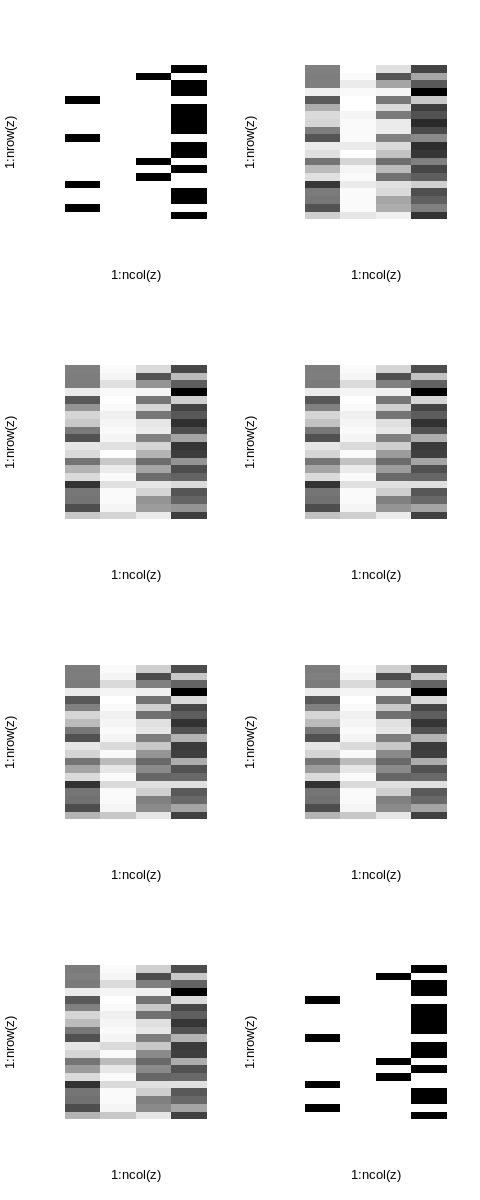

In [31]:
options(repr.plot.width=4, repr.plot.height=10)
par(mfrow=c(4,2))
v<-c(1,1,2,4,7,15,50)
plot.matrix(z)
for (j in 1:7){
  #heatmap.2(z,col=),Rowv=NULL,Colv=NULL,trace="none",key=FALSE,dendrogram="none")   
  for (i in 1:v[j]){
    zn<-new_z_Estep(a,l,hard=i==50)
    stopifnot(all(abs(rowSums(zn)-1)<0.00001))
    print(sqrt(sum(abs((zn-z)^2))))
    z<-zn

    an<-new_a_Mstep(z,a_prior)
      
    print(sqrt(sum(abs((an-a)^2))))
    a<-an
    a
    z
  }
  plot.matrix(z)   
}
#dev.off()

In [18]:
plot.matrix<-function(z,low=0,high=1){    
    image(1:ncol(z), 1:nrow(z), round(t((z-low)/(high-low))*100), 
          #col = grey_pal(1,0)(100),
          col = c(grey_pal(1,0.5)(20),grey_pal(0.5,0)(80)), 
          axes = FALSE)
}

In [909]:
?grey_pal

In [44]:
options(repr.plot.width=4, repr.plot.height=10)

zorig<-new_z_Estep(a,l)
z<-zorig

#par(mfrow=c(4,2))
library(animation)
saveGIF({
#saveVideo({
v<-c(1,1,2,4,7,10,15,25,45,65,90)
plot.matrix(z)
for (j in 1:length(v)){
  #heatmap.2(z,col=),Rowv=NULL,Colv=NULL,trace="none",key=FALSE,dendrogram="none")   
  for (i in 1:v[j]){
    zn<-new_z_Estep(a,l,hard=i==90)
    stopifnot(all(abs(rowSums(zn)-1)<0.00001))
    print(sqrt(sum(abs((zn-z)^2))))
    z<-zn

    an<-new_a_Mstep(z,a_prior)

    print(sqrt(sum(abs((an-a)^2))))
    a<-an
    a
    z
  }
  plot.matrix(z) #image(1:ncol(z), 1:nrow(z), round(t(z)*100), col = c(grey_pal(1,0.8)(20),grey_pal(0.2,0)(20)), axes = FALSE)    
}
},movie.name = "EM_animation.gif", img.name = "zRplot", convert = "convert",   
#},video.name = "animation.mp4", img.name = "zRplot",
interval=1,loop=TRUE)          
#dev.off()

[1] 0
[1] 0.4143345
[1] 1.525504
[1] 0.1758832
[1] 0.7414222
[1] 0.09226361
[1] 0.5140885
[1] 0.06392025
[1] 0.3785036
[1] 0.04692866
[1] 0.2703879
[1] 0.03338994
[1] 0.1870077
[1] 0.02296927
[1] 0.1266591
[1] 0.0154656
[1] 0.08478393
[1] 0.01029434
[1] 0.05640846
[1] 0.006815089
[1] 0.03741941
[1] 0.004502002
[1] 0.02479119
[1] 0.002972416
[1] 0.0164179
[1] 0.001962945
[1] 0.01087279
[1] 0.001296974
[1] 0.007201978
[1] 0.0008574636
[1] 0.004771812
[1] 0.0005672247
[1] 0.003162594
[1] 0.0003754283
[1] 0.002096658
[1] 0.0002486018
[1] 0.001390356
[1] 0.0001646873
[1] 0.000922204
[1] 0.0001091367
[1] 0.0006118129
[1] 7.234611e-05
[1] 0.0004059662
[1] 4.797066e-05
[1] 0.0002694207
[1] 3.181538e-05
[1] 0.0001788268
[1] 2.110507e-05
[1] 0.0001187101
[1] 1.400277e-05
[1] 7.881141e-05
[1] 9.291992e-06
[1] 5.232764e-05
[1] 6.166856e-06
[1] 3.474631e-05
[1] 4.093283e-06
[1] 2.307372e-05
[1] 2.717233e-06
[1] 1.532335e-05
[1] 1.803947e-06
[1] 1.017687e-05
[1] 1.197727e-06
[1] 6.75921e-06
[1] 7.95

Executing: 
convert -loop 0 -delay 100 zRplot1.png zRplot2.png zRplot3.png
    zRplot4.png zRplot5.png zRplot6.png zRplot7.png zRplot8.png
    zRplot9.png zRplot10.png zRplot11.png zRplot12.png
    'EM_animation.gif'
Output at: EM_animation.gif


[1] TRUE

![animation](EM_animation.gif "EM animation")

In [474]:
#set working directory
#setwd('~/Documents/R/images/')

frames = 50

for(i in 1:frames){
 # creating a name for each plot file with leading zeros
 if (i < 10) {name = paste('000',i,'plot.png',sep='')}

 if (i < 100 && i >= 10) {name = paste('00',i,'plot.png', sep='')}
 if (i >= 100) {name = paste('0', i,'plot.png', sep='')}
 x = seq(0, i, 1)
 f.3 = dbinom(x, size = i, prob=.3)
 f.7 = dbinom(x, size = i, prob=.7)

 #saves the plot as a .png file in the working directory
 png(name)
 plot(x, f.3, type='h', xlim = c(0,frames), ylim = c(0,.7), ylab ='probability',   
      main = paste('Binomial density with n = ', i), col = 'red')

 lines(x,f.7,type='h',col='blue')
 text(45, .6, 'p = .3', col='red')
 text(45, .6, 'p = .7', col='blue', pos=1)
 dev.off()
}

In [475]:
system('convert *.png -delay 1 -loop 0 binom.gif')

In [479]:
#library(IRkernel)
display_javascript()

ERROR: Error in prepare_content(isbinary, data, file): Data needs to be a raw vector


In [477]:
library(IRdisplay)

In [389]:
a
zorig-z

max(abs(aorig-a))
max(abs(zorig-z))

max(abs(z-l/rowSums(l)))
#pmax(a)
summary(rowMaxs(z))

[1] 0.16080112 0.06810696 0.25498434 0.51610758

-0.0069793562,2.292601e-03,0.04515017,-0.040463411
-0.0110303760,-5.674548e-06,0.05290991,-0.041873864
-0.0030741176,2.978433e-03,0.02157604,-0.021480352
-0.0066085231,1.006746e-02,0.06883773,-0.072296665
-0.0051644854,7.183118e-04,0.02342196,-0.018975787
-0.0331548390,8.240760e-03,0.08146302,-0.056548944
-0.0001700495,9.909940e-04,0.01608024,-0.016901182
-0.0037387894,1.997229e-03,0.06195742,-0.060215863
-0.0028243306,1.115591e-03,0.01595178,-0.014243045
-0.0055504080,9.479194e-04,0.07442231,-0.069819826
-0.0038568687,7.451913e-04,0.04479756,-0.041685878


[1] 0.1347913

[1] 0.08146302

[1] 0.3552117

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3655  0.6042  0.7604  0.7529  0.9101  0.9513 

In [179]:
library(matrixStats)

In [211]:
t(t(matrix(1:4,2,2))*c(1,2))

1,6
2,8


In [325]:
z-(l/rowSums(l))

-0.0316070048,-0.150798423,-0.050476509,0.23288194
-0.0081582305,-0.045642086,-0.111999823,0.16580014
-0.0015240146,-0.278970527,0.152831960,0.12766258
-0.0069793724,-0.309421526,-0.009514661,0.32591556
-0.0114450336,-0.140522730,-0.049884786,0.20185255
-0.0659742352,-0.047296883,-0.077692454,0.19096357
-0.0205640784,-0.032045829,-0.132858290,0.18546820
-0.0031539629,-0.028450768,-0.059837506,0.09144224
-0.0103797569,-0.136913846,0.031601931,0.11569167
-0.0004011748,-0.015444346,-0.147144738,0.16299026
-0.0151496843,-0.043197045,-0.021668143,0.08001487


In [335]:
library(scales)
grey_pal

function (start = 0.2, end = 0.8) 
{
    function(n) grDevices::grey.colors(n, start = start, end = end)
}
<environment: namespace:scales>

Warning message in heatmap.2(z, col = grey_pal(1, 0), Rowv = NULL, Colv = NULL, :
“Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.”Warning message in heatmap.2(z, col = grey_pal(1, 0), Rowv = NULL, Colv = NULL, :
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”

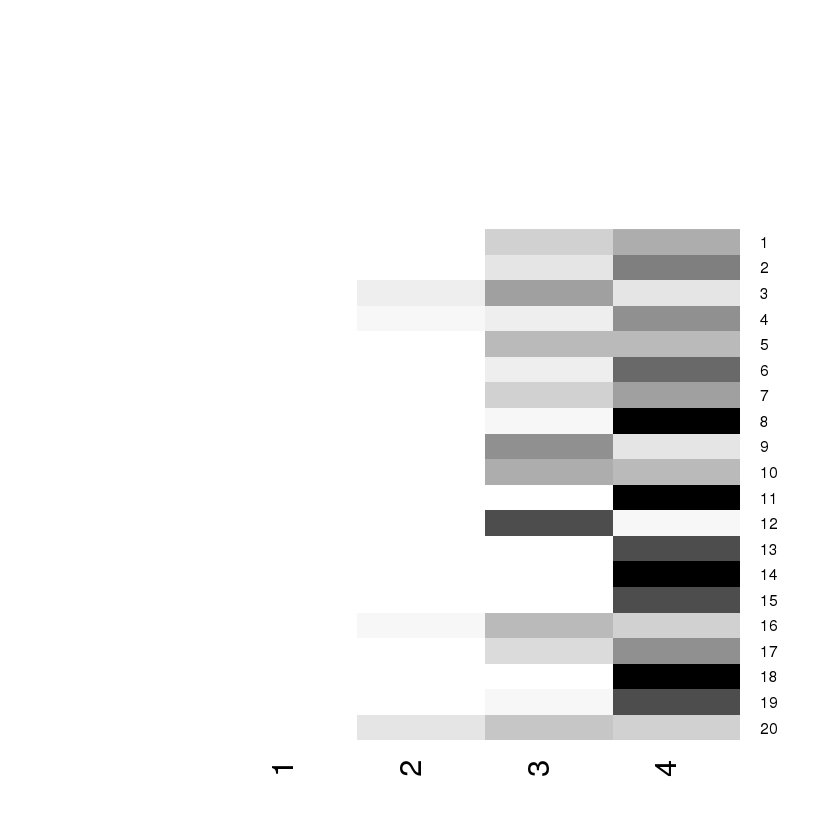

In [341]:
heatmap.2(z,col=grey_pal(1,0),Rowv=NULL,Colv=NULL,trace="none",key=FALSE)

In [338]:
?heatmap.2

In [36]:
matrix(1:4,2,2)==c(2,4)

FALSE,FALSE
FALSE,TRUE
